In [52]:
import math
import numpy as np
import matplotlib.pyplot as plt


UNSUALRATIO=1


In [ ]:
#add_days
from datetime import datetime, timedelta

def add_day(date, days):
    lastday=datetime.strptime(date, '%Y-%m-%d')
    return (lastday+timedelta(days=days)).strftime('%Y-%m-%d')



In [47]:
#getdata


datadata1 = [1.764052345967664, 0.4001572083672233, 0.9787379841057392, 2.240893199201458, 1.8675579901499675, 0.977277879876411, 0.9500884175255894, 0.1513572082976979, 0.10321885179355784, 0.41059850193837233, 0.144043571160878, 1.454273506962975, 0.7610377251469934, 0.12167501649282841, 0.44386323274542566, 0.33367432737426683, 1.4940790731576061, 0.20515826376580087, 0.31306770165090136, 0.8540957393017248, 2.5529898158340787, 0.6536185954403606, 0.8644361988595057, 0.7421650204064419, 2.2697546239876076, 1.4543656745987648, 0.04575851730144607, 0.1871838500258336, 1.5327792143584575, 1.469358769900285]

datadata2 = [2.4444900454649066, 1.2114583477420486, 1.5722444651970389, 3.849659317044043, 2.9795201838121526, 1.8192034039105907, 1.4303826366487944, 1.1199710593994645, 0.21828432404214673, 0.8168924346299092, 1.1576407052694442, 1.5075307298732392, 0.5063140884776233, 0.6672108788182483, 0.07923314656105851, 1.4723220838860467, 2.0343091193565352, 0.0659900100716776, 1.4310725657165444, 2.021401004669799, 4.763264203964403, 1.4334502222982335, 0.8660414557619074, 2.0682800071591796, 3.2706302505057216, 2.5827767097963448, 0.5422637598390431, 0.2032707284933333, 2.6062085067107263, 2.6651414906336908]


data1= pd.Series(datadata1).pct_change().tolist()
data2= pd.Series(datadata2).pct_change().tolist()
data1.remove(data1[0])
data2.remove(data2[0])

st="2008-01-01"
et="2008-01-30"

print(data1)
print(data2)


[-0.7731602413715685, 1.445883676816222, 1.2895741614124994, -0.1666010719228066, -0.47670814773578507, -0.02782162874111105, -0.8406914498632742, -0.31804469073887, 2.9779409943407145, -0.6491863207467381, 9.096066733438178, -0.4766887236113495, -0.8401195992362572, 2.6479406006210584, -0.24824967972590972, 3.4776566567609137, -0.8626858059579023, 0.5259814345489142, 1.7281502844203276, 1.989114332687461, -0.7439791606740824, 0.322539176348114, -0.14144615717664566, 2.0582883342367593, -0.3592410125621115, -0.9685371305850778, 3.0906887081308074, 7.1886295967676475, -0.04137611200887603]
[-0.5044126483601012, 0.297811408974509, 1.4485119218159186, -0.22603016567710876, -0.3894307500266678, -0.21373133231060393, -0.21701296512979562, -0.8050982458786103, 2.742332108430206, 0.41712746525056255, 0.3022440581184964, -0.6641434377127445, 0.3177805911433489, -0.8812472202171001, 17.58214835316995, 0.3817011519566289, -0.9675614637697979, 20.68620014093239, 0.41250769045221314, 1.35641725365

In [23]:

def Method1():
    # 定义两组数据
    np.random.seed(0)
    BITO = data1
    BTC = data2 

    # 计算相关性
    correlation_coef = np.corrcoef(BITO, BTC)[0, 1]
    print("相关性系数：", correlation_coef)

    # 绘制散点图
    plt.scatter(BITO, BTC)
    plt.xlabel("BITO")
    plt.ylabel("BTC")
    plt.title("BITO vs BTC")
    plt.show()

    # 计算 pearson 相关性
    from scipy.stats import pearsonr
    pearson_coef, p_value = pearsonr(BITO, BTC)
    print("Pearson 相关性系数：", pearson_coef)
    print("p 值：", p_value)

    # 计算 spearman 等级相关性
    from scipy.stats import spearmanr
    spearman_coef, p_value = spearmanr(BITO, BTC)
    print("Spearman 等级相关性系数：", spearman_coef)
    print("p 值：", p_value)


In [54]:
#绘制pct直方图
def Method2():
    import numpy as np
    import matplotlib.pyplot as plt

    # 假设X和Y是两组数据
    x = np.array(data1)
    y = np.array(data2)

    # 绘制直方图
    plt.hist([x, y], alpha=0.5, label=['X', 'Y'])

    plt.legend()
    plt.show()



In [59]:
#提取异常数据

def my_abs(x):
    if x<0:
        return -x
    else:
        return x

def Method3():
    len11= len(data1)
    unusualList=[]
    for i in range(len11):
        
        if my_abs(data1[i]-data2[i])>UNSUALRATIO:
            t=[i,add_day(st,i),data1[i],data2[i]]
            unusualList.append(t)
            
    print(unusualList)
    return unusualList
    
unusualList=Method3()
    

[[1, '2008-01-02', 1.445883676816222, 0.297811408974509], [9, '2008-01-10', -0.6491863207467381, 0.41712746525056255], [10, '2008-01-11', 9.096066733438178, 0.3022440581184964], [12, '2008-01-13', -0.8401195992362572, 0.3177805911433489], [13, '2008-01-14', 2.6479406006210584, -0.8812472202171001], [14, '2008-01-15', -0.24824967972590972, 17.58214835316995], [15, '2008-01-16', 3.4776566567609137, 0.3817011519566289], [17, '2008-01-18', 0.5259814345489142, 20.68620014093239], [18, '2008-01-19', 1.7281502844203276, 0.41250769045221314], [22, '2008-01-23', -0.14144615717664566, 1.388199771960792], [23, '2008-01-24', 2.0582883342367593, 0.5813285624696398], [26, '2008-01-27', 3.0906887081308074, -0.6251441760488126], [27, '2008-01-28', 7.1886295967676475, 11.821366490041395]]


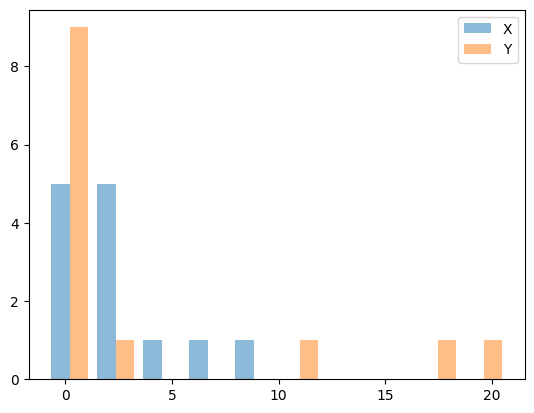

In [60]:
import numpy as np
import matplotlib.pyplot as plt
# 假设X和Y是两组数据
x = np.array([i[2] for i in unusualList])
y = np.array([i[3] for i in unusualList])

    # 绘制直方图
plt.hist([x, y], alpha=0.5, label=['X', 'Y'])

plt.legend()
plt.show()

相关性系数： 0.15340126311234686


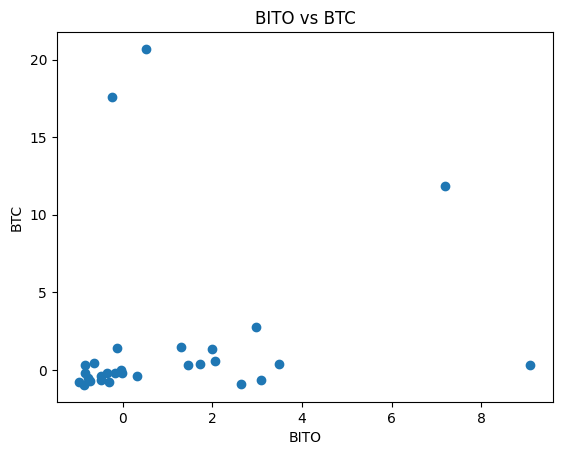

Pearson 相关性系数： 0.15340126311234686
p 值： 0.4269203012399839
Spearman 等级相关性系数： 0.4458128078817733
p 值： 0.015357494291978635


In [25]:
Method1()